# ОИАД. Лабораторная работа №1

Возьмите столбец $1 \% 7 $  => Sleep_Hours

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
N = 1
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Sleep_Hours'

In [2]:
df = pd.read_csv('../../datasets/teen_phone_addiction_dataset.csv')

data = df["Sleep_Hours"]

--- Sleep_Hours ---
Среднее: 6.489766666666668
Дисперсия: 2.2222260208958544
Мода: 6.1
Медиана: 6.5
Квантили (25%, 50%, 75%): [5.5 6.5 7.5]
Эксцесс: -0.2969486466071465
Ассиметрия: 0.011848322655812933
Интерквартильный размах: 2.0


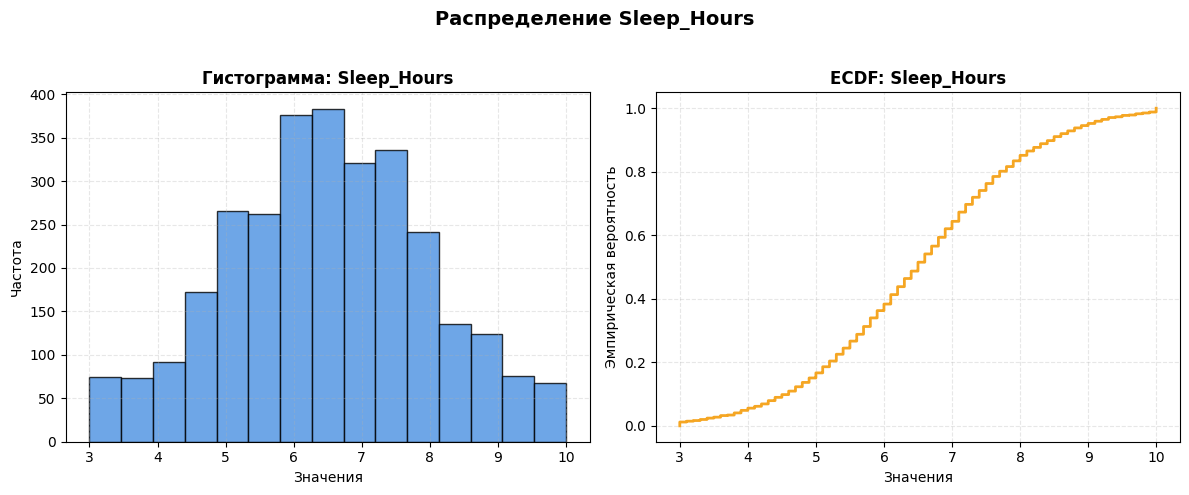

In [14]:
def descriptive_stats(data, title="Data"):
    mean = np.mean(data)
    variance = np.var(data, ddof=1)
    mode = data.mode()[0] if hasattr(data, "mode") else stats.mode(data)[0][0]
    median = np.median(data)
    quantiles = np.percentile(data, [25, 50, 75])
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data, fisher=True)
    iqr = stats.iqr(data)

    print(f"--- {title} ---")
    print("Среднее:", mean)
    print("Дисперсия:", variance)
    print("Мода:", mode)
    print("Медиана:", median)
    print("Квантили (25%, 50%, 75%):", quantiles)
    print("Эксцесс:", kurtosis)
    print("Ассиметрия:", skewness)
    print("Интерквартильный размах:", iqr)

    # --- Гистограмма и ECDF ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Гистограмма
    axes[0].hist(data, bins=15, alpha=0.8, color='#4a90e2', edgecolor='black')
    axes[0].set_title(f'Гистограмма: {title}', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Значения', fontsize=10)
    axes[0].set_ylabel('Частота', fontsize=10)
    axes[0].grid(alpha=0.3, linestyle='--')
    
    # Эмпирическая функция распределения
    sorted_data = np.sort(data)
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axes[1].step(sorted_data, ecdf, where='post', color='#f5a623', linewidth=2)
    axes[1].set_title(f'ECDF: {title}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Значения', fontsize=10)
    axes[1].set_ylabel('Эмпирическая вероятность', fontsize=10)
    axes[1].grid(alpha=0.3, linestyle='--')
    
    plt.suptitle(f'Распределение {title}', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
descriptive_stats(data, "Sleep_Hours")


**1. Опишите полученные числовые характеристики и графики**

Большинство подростков спят примерно 6–7 часов в день. Данные распределены симметрично, резких отклонений почти нет, в целом распределение близко к нормальному.

* **Гистограмма** показывает, что большинство значений сосредоточено вокруг 6–7 часов, а общие значения варьируются примерно от 3 до 10 часов.
* **ECDF** показывает плавный рост, почти линейный в середине, что говорит о равномерном распределении значений в этой области.

**Итог:** Время сна подростков в среднем около 6,5 часов, с небольшим разбросом, данные примерно нормальные и без резких пиков.


## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

--- Sleep_Hours ---
Хи-квадрат статистика: 786.40
Ассиметрия (skewness): 0.01
Эксцесс (kurtosis, Fisher): -0.30


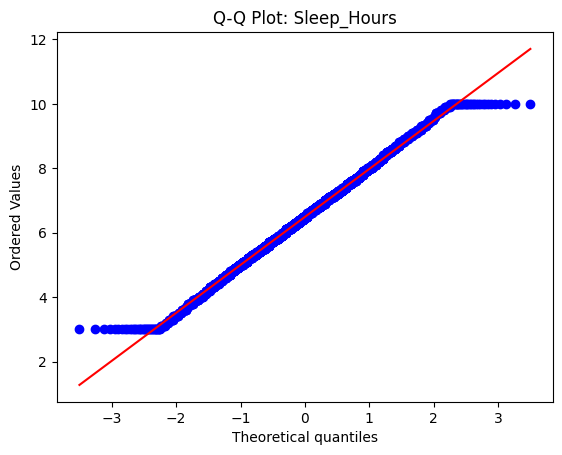

In [ ]:
def normality_tests(data, title="Data"):
    n = len(data)
    
    # Хи-квадрат
    k_bins = int(np.sqrt(n))
    bins = np.linspace(data.min(), data.max(), k_bins+1)
    observed, _ = np.histogram(data, bins=bins)
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)
    cdf = stats.norm.cdf(bins, loc=mean_val, scale=std_val)
    expected = n * np.diff(cdf)
    chi_square = np.sum((observed - expected)**2 / expected)
    print(f"--- {title} ---")
    print(f"Хи-квадрат статистика: {chi_square:.2f}")

    # Ассиметрия и эксцесс
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data, fisher=True)
    print(f"Ассиметрия (skewness): {skewness:.2f}")
    print(f"Эксцесс (kurtosis, Fisher): {kurtosis:.2f}")

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {title}")
    plt.show()

normality_tests(data, "Sleep_Hours")

**2. Являются ли данные нормальными**

Большая часть точек лежит почти на прямой линии (красная), что говорит о том, что распределение близко к нормальному.

Есть небольшие отклонения в крайних точках (по обеим сторонам), особенно на нижнем и верхнем хвостах — это выбросы.

Верхние значения около 10 ч и нижние около 3 ч выбиваются немного из линии, поэтому распределение не идеально нормальное, есть лёгкие хвосты.

Вывод: Sleep_Hours в исходных данных почти нормальны, но присутствуют небольшие выбросы, которые немного искажают распределени

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

--- Sleep_Hours (Без выбросов) ---
Среднее: 6.489766666666668
Дисперсия: 2.2222260208958544
Мода: 6.1
Медиана: 6.5
Квантили (25%, 50%, 75%): [5.5 6.5 7.5]
Эксцесс: -0.2969486466071465
Ассиметрия: 0.011848322655812933
Интерквартильный размах: 2.0


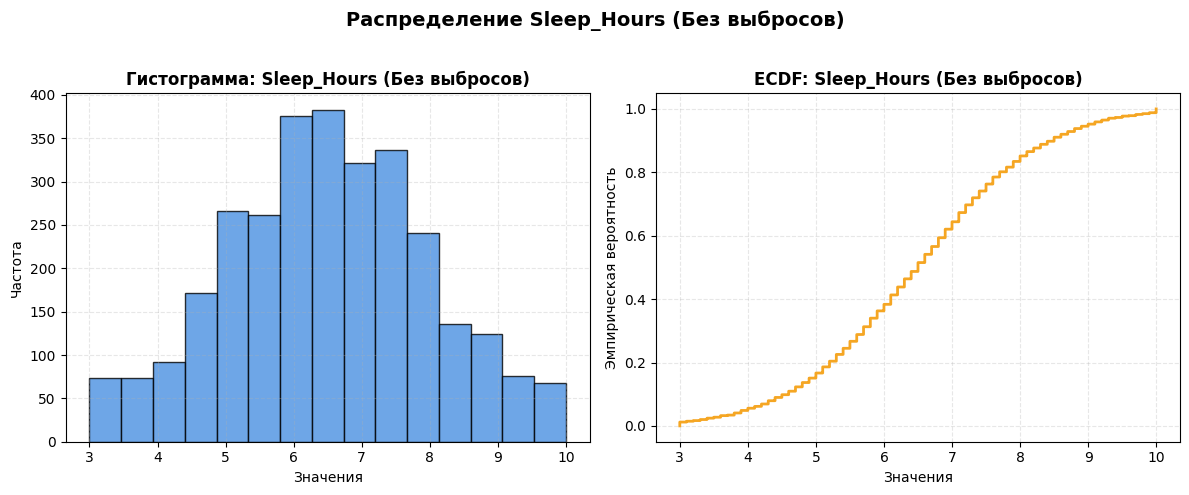

--- Sleep_Hours (Без выбросов) ---
Хи-квадрат статистика: 786.40
Ассиметрия (skewness): 0.01
Эксцесс (kurtosis, Fisher): -0.30


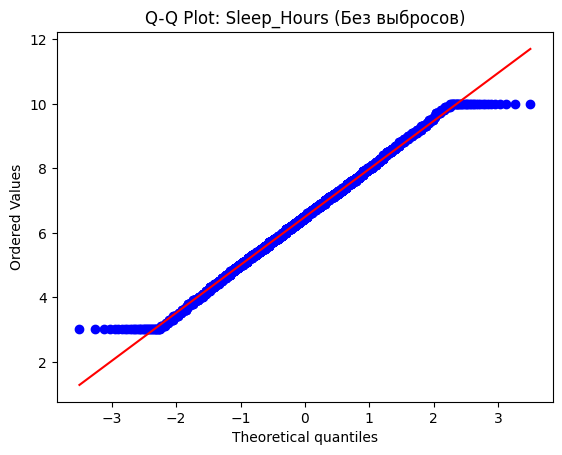

--- Sleep_Hours (Стандартизированные) ---
Среднее: -9.059419880941278e-16
Дисперсия: 1.0
Мода: -0.26146320513613586
Медиана: 0.006864722823636601
Квантили (25%, 50%, 75%): [-0.6639551   0.00686472  0.67768454]
Эксцесс: -0.2969486466071465
Ассиметрия: 0.011848322655815632
Интерквартильный размах: 1.3416396397988612


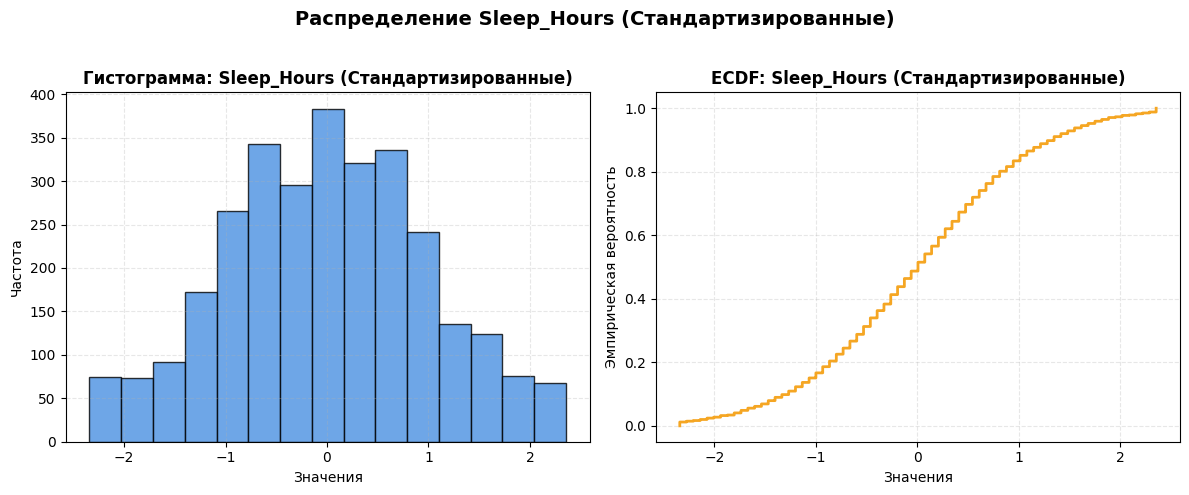

--- Sleep_Hours (Стандартизированные) ---
Хи-квадрат статистика: 773.36
Ассиметрия (skewness): 0.01
Эксцесс (kurtosis, Fisher): -0.30


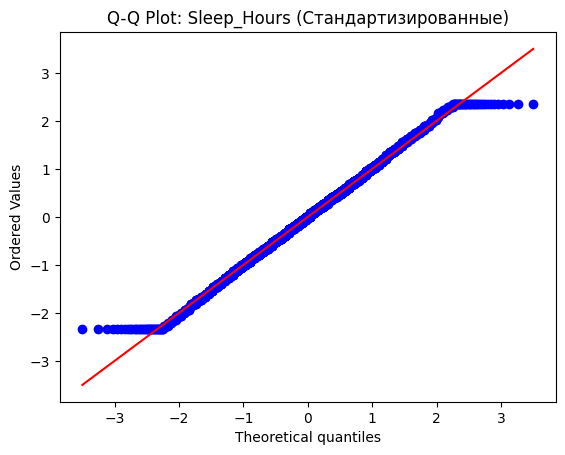

--- Sleep_Hours (Логарифмированные) ---
Среднее: 1.841727135547376
Дисперсия: 0.06009124032844768
Мода: 1.8082887711792655
Медиана: 1.8718021769015913
Квантили (25%, 50%, 75%): [1.70474809 1.87180218 2.01490302]
Эксцесс: 0.3917952888461689
Ассиметрия: -0.6520045315078272
Интерквартильный размах: 0.3101549283038394


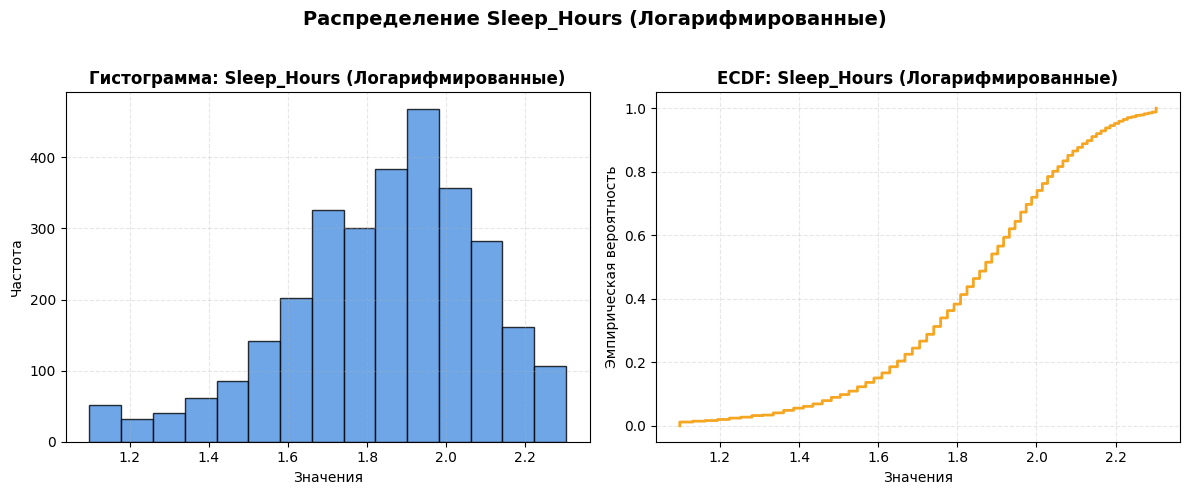

--- Sleep_Hours (Логарифмированные) ---
Хи-квадрат статистика: 1499.10
Ассиметрия (skewness): -0.65
Эксцесс (kurtosis, Fisher): 0.39


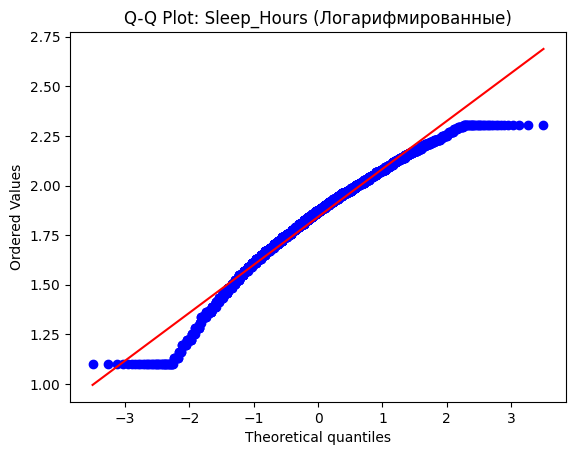

In [ ]:
# Удаление выбросов по IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

# Стандартизация (z-score)
data_std = (data_no_outliers - np.mean(data_no_outliers)) / np.std(data_no_outliers, ddof=1)

# Логарифмирование (только положительные значения)
data_log = np.log(data_no_outliers[data_no_outliers > 0])

datasets = [
    (data_no_outliers, "Sleep_Hours (Без выбросов)"),
    (data_std, "Sleep_Hours (Стандартизированные)"),
    (data_log, "Sleep_Hours (Логарифмированные)")
]

for dataset, title in datasets:
    descriptive_stats(dataset, title)
    normality_tests(dataset, title)


**3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)**

Логарифмирование: ухудшило нормальность (не рекомендовано).

Стандартизация: форма распределения почти не изменилась — просто другой масштаб.

Удаление выбросов: эффект минимальный, данные и так были почти нормальными.

Общее заключение:
Исходные данные Sleep_Hours уже близки к нормальному распределению. Обработка (логарифмирование или удаление выбросов) практически не улучшила нормальность, а логарифмирование даже ухудшило её.

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы


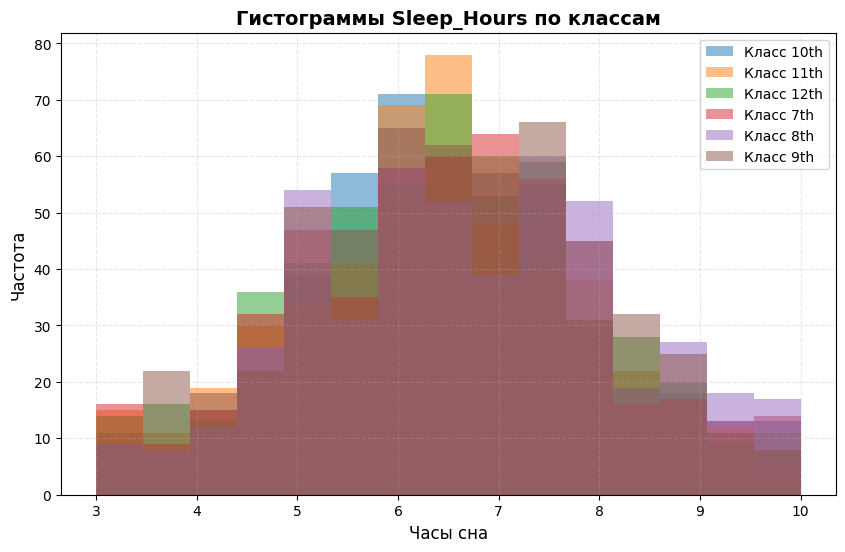

Среднее и дисперсия Sleep_Hours по классам:
               Среднее  Дисперсия
School_Grade                     
10th          6.488296   2.102064
11th          6.367432   2.113079
12th          6.459735   2.201804
7th           6.483702   2.287617
8th           6.675311   2.406853
9th           6.468441   2.196945


In [20]:
grouped = df.groupby('School_Grade')['Sleep_Hours']

# Построение гистограмм на одном графике
plt.figure(figsize=(10,6))

for grade, group_data in grouped:
    plt.hist(group_data, bins=15, alpha=0.5, label=f'Класс {grade}')

plt.title('Гистограммы Sleep_Hours по классам', fontsize=14, fontweight='bold')
plt.xlabel('Часы сна', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()

# Расчёт среднего и дисперсии для каждой группы
stats_per_grade = grouped.agg(['mean', 'var']).rename(columns={'mean': 'Среднее', 'var': 'Дисперсия'})
print("Среднее и дисперсия Sleep_Hours по классам:")
print(stats_per_grade)


**4. Различия распределений внутри разных групп 'School_Grade'**
**Различия по классам `School_Grade`:**
* Среднее сна: 6.37–6.68 ч, наибольшее у 8-го, наименьшее у 11-го.
* Дисперсия: 2.10–2.41, разброс немного больше у 8-го класса.
* Вывод: различия минимальны, подростки спят примерно одинаково.